Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [3]:
import json
from urllib.request import urlopen
import pandas as pd


url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = urlopen(url)

# from url in data to json
data_json = json.loads(response.read())

#converting into datafame as main data is under the episodes keys in json format..
df = pd.DataFrame(data_json["_embedded"]["episodes"])

df.sample(3)

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,{'average': 8.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...
18,1459789,https://www.tvmaze.com/episodes/1459789/westwo...,Vanishing Point,2,9,regular,2018-06-17,21:00,2018-06-18T01:00:00+00:00,60,{'average': 8.4},{'medium': 'https://static.tvmaze.com/uploads/...,<p>The Man learns that his grip on reality isn...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        36 non-null     int64         
 1   url       36 non-null     object        
 2   name      36 non-null     object        
 3   season    36 non-null     int64         
 4   number    36 non-null     int64         
 5   type      36 non-null     object        
 6   airdate   36 non-null     datetime64[ns]
 7   airtime   36 non-null     object        
 8   airstamp  36 non-null     object        
 9   runtime   36 non-null     int64         
 10  rating    36 non-null     float64       
 11  image     36 non-null     object        
 12  summary   36 non-null     object        
 13  _links    36 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 4.1+ KB


In [4]:
df['rating'].sample(2)

26    {'average': 7.5}
16    {'average': 7.9}
Name: rating, dtype: object

In [5]:
df['rating'] = df['rating'].apply(pd.Series)['average']

In [6]:
df['rating'].sample(2)

31    7.7
26    7.5
Name: rating, dtype: float64

In [52]:
# ● Get all the overall ratings for each season and using plots compare the ratings for all the
# seasons, like season 1 ratings, season 2, and so on.
import matplotlib.pyplot as plt
import seaborn as sns

gr = df.groupby('season')['rating'].sum().sort_values(ascending=False)
gr

season
1    80.9
2    80.0
3    62.2
4    60.3
Name: rating, dtype: float64

<Axes: title={'center': 'Grouped Bar Graph with dataframe'}, xlabel='season'>

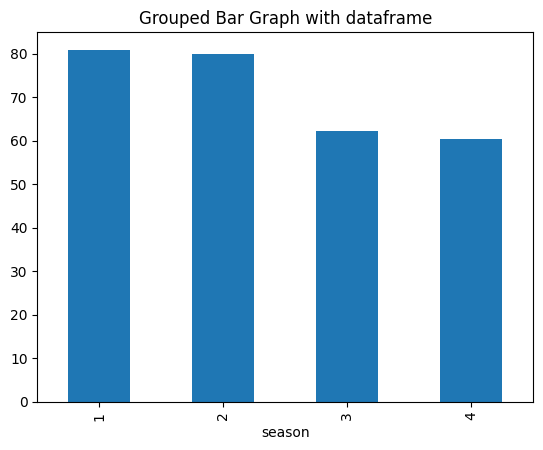

In [53]:
gr.plot(x='season',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

In [38]:
df[['name','season']]

,name,season
0,The Original,1
1,Chestnut,1
2,The Stray,1
3,Dissonance Theory,1
4,Contrapasso,1
5,The Adversary,1
6,Trompe L'Oeil,1
7,Trace Decay,1
8,The Well-Tempered Clavier,1
9,The Bicameral Mind,1


In [30]:
# ● Get all the episode names, whose average rating is more than 8 for every season
gr = df.groupby('name').filter(lambda s: s.rating.mean()>=8.0)

gr


,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>While Maeve convinces Felix to show her ""up...",{'self': {'href': 'https://api.tvmaze.com/epis...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,8.6,{'medium': 'https://static.tvmaze.com/uploads/...,<p>While William and Dolores travel to the unc...,{'self': {'href': 'https://api.tvmaze.com/epis...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,8.5,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard forces Robert to take him back into...,{'self': {'href': 'https://api.tvmaze.com/epis...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...
13,1440917,https://www.tvmaze.com/episodes/1440917/westwo...,The Riddle of the Sphinx,2,4,regular,2018-05-13,21:00,2018-05-14T01:00:00+00:00,71,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>William pays his recuperating father-in-law...,{'self': {'href': 'https://api.tvmaze.com/epis...
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,21:00,2018-06-11T01:00:00+00:00,60,8.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Another of Westworld's Host revolutionaries...,{'self': {'href': 'https://api.tvmaze.com/epis...
18,1459789,https://www.tvmaze.com/episodes/1459789/westwo...,Vanishing Point,2,9,regular,2018-06-17,21:00,2018-06-18T01:00:00+00:00,60,8.4,{'medium': 'https://static.tvmaze.com/uploads/...,<p>The Man learns that his grip on reality isn...,{'self': {'href': 'https://api.tvmaze.com/epis...
19,1459790,https://www.tvmaze.com/episodes/1459790/westwo...,The Passenger,2,10,regular,2018-06-24,21:00,2018-06-25T01:00:00+00:00,90,8.5,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>The Man faces a personal reckoning, while A...",{'self': {'href': 'https://api.tvmaze.com/epis...


<Axes: title={'center': 'Mean Rating of seasons'}, xlabel='name'>

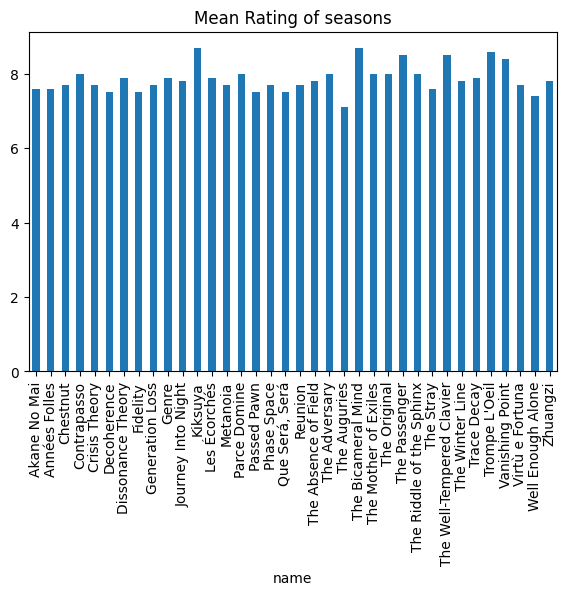

In [21]:
# ● Get all the episode names, whose average rating is more than 8 for every season
# Set up a grid of plots
fig = plt.figure(figsize=(15,15)) 
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (0, 0))
df.groupby('name')['rating'].mean().plot(kind='bar', title='Mean Rating of seasons')

In [54]:
# ● Get all the episode names that aired before May 2019

df['airdate'] = pd.to_datetime(df['airdate'], errors = 'coerce')
df_2T = df[df['airdate'].dt.year < 2019]
df_2T

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,7.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>While Maeve convinces Felix to show her ""up...",{'self': {'href': 'https://api.tvmaze.com/epis...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,8.6,{'medium': 'https://static.tvmaze.com/uploads/...,<p>While William and Dolores travel to the unc...,{'self': {'href': 'https://api.tvmaze.com/epis...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,2016-11-21T02:00:00+00:00,60,7.9,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard tries to cope with what he did unde...,{'self': {'href': 'https://api.tvmaze.com/epis...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,8.5,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard forces Robert to take him back into...,{'self': {'href': 'https://api.tvmaze.com/epis...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [91]:
# ● Get the episode name from each season with the highest and lowest rating
df.groupby('season')['rating'].max()

season
1    8.7
2    8.7
3    8.0
4    7.8
Name: rating, dtype: float64

In [105]:
l = df.groupby('season')['rating'].max()

df[df['rating'].isin(l)]

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,max
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.8
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>While Maeve convinces Felix to show her ""up...",{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
10,1214222,https://www.tvmaze.com/episodes/1214222/westwo...,Journey Into Night,2,1,regular,2018-04-22,21:00,2018-04-23T01:00:00+00:00,74,7.8,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>In the aftermath of the host rebellion, the...",{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
13,1440917,https://www.tvmaze.com/episodes/1440917/westwo...,The Riddle of the Sphinx,2,4,regular,2018-05-13,21:00,2018-05-14T01:00:00+00:00,71,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,<p>William pays his recuperating father-in-law...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,21:00,2018-06-11T01:00:00+00:00,60,8.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Another of Westworld's Host revolutionaries...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
20,1789333,https://www.tvmaze.com/episodes/1789333/westwo...,Parce Domine,3,1,regular,2020-03-15,21:00,2020-03-16T01:00:00+00:00,70,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>If you're stuck in a loop, try walking in a...",{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
21,1800146,https://www.tvmaze.com/episodes/1800146/westwo...,The Winter Line,3,2,regular,2020-03-22,21:00,2020-03-23T01:00:00+00:00,60,7.8,{'medium': 'https://static.tvmaze.com/uploads/...,<p>People put up a lot of walls. Bring a sledg...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
22,1800147,https://www.tvmaze.com/episodes/1800147/westwo...,The Absence of Field,3,3,regular,2020-03-29,21:00,2020-03-30T01:00:00+00:00,60,7.8,{'medium': 'https://static.tvmaze.com/uploads/...,<p>If you don't like what you see in the mirro...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN


In [106]:
df.groupby('season')['rating'].min()
#minimum rating seasonwise

season
1    7.6
2    7.6
3    7.5
4    7.1
Name: rating, dtype: float64

In [107]:
l = df.groupby('season')['rating'].min()

df[df['rating'].isin(l)]

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,max
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.7
14,1446362,https://www.tvmaze.com/episodes/1446362/westwo...,Akane No Mai,2,5,regular,2018-05-20,21:00,2018-05-21T01:00:00+00:00,60,7.6,{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Maeve and her people explore Shogun W...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
25,1829375,https://www.tvmaze.com/episodes/1829375/westwo...,Decoherence,3,6,regular,2020-04-19,21:00,2020-04-20T01:00:00+00:00,60,7.5,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Do a lot of people tell you that you need t...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
26,1800151,https://www.tvmaze.com/episodes/1800151/westwo...,Passed Pawn,3,7,regular,2020-04-26,21:00,2020-04-27T01:00:00+00:00,60,7.5,{'medium': 'https://static.tvmaze.com/uploads/...,<p>A real friend is one who walks in when the ...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
28,2326389,https://www.tvmaze.com/episodes/2326389/westwo...,The Auguries,4,1,regular,2022-06-26,21:00,2022-06-27T01:00:00+00:00,55,7.1,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Hello again. Don't worry about a thing. It'...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
30,2326656,https://www.tvmaze.com/episodes/2326656/westwo...,Années Folles,4,3,regular,2022-07-10,21:00,2022-07-11T01:00:00+00:00,55,7.6,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>You can never go back again. But if you do,...",{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
33,2326659,https://www.tvmaze.com/episodes/2326659/westwo...,Fidelity,4,6,regular,2022-07-31,21:00,2022-08-01T01:00:00+00:00,60,7.5,{'medium': 'https://static.tvmaze.com/uploads/...,<p>To thine own selves be true.</p>,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN
35,2326661,https://www.tvmaze.com/episodes/2326661/westwo...,"Que Será, Será",4,8,regular,2022-08-14,21:00,2022-08-15T01:00:00+00:00,60,7.5,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Like what I've done with the place? (I just...,{'self': {'href': 'https://api.tvmaze.com/epis...,NaN


In [120]:
# ● Get the summary for the most popular ( ratings ) episode in every season

df.groupby(['season', 'name'])['rating'].max().sort_values(ascending=False)

season  name                     
2       Kiksuya                      8.7
1       The Bicameral Mind           8.7
        Trompe L'Oeil                8.6
        The Well-Tempered Clavier    8.5
2       The Passenger                8.5
        Vanishing Point              8.4
1       The Original                 8.0
        Contrapasso                  8.0
3       The Mother of Exiles         8.0
1       The Adversary                8.0
3       Parce Domine                 8.0
2       The Riddle of the Sphinx     8.0
1       Trace Decay                  7.9
2       Les Écorchés                 7.9
3       Genre                        7.9
1       Dissonance Theory            7.9
3       The Winter Line              7.8
        The Absence of Field         7.8
4       Zhuangzi                     7.8
2       Journey Into Night           7.8
        Virtù e Fortuna              7.7
4       Metanoia                     7.7
        Generation Loss              7.7
3       Crisis Theory  